# K Nearest Neighbors with Python - Purchase Behavior
In this project we will be analyzing an purchasing data set, indicating whether or not a particular customer purchased a product.

This data set contains the following features:

* 'User ID': internal ID given to the customer
* 'Gender': customer gender (Male or Female)
* 'Age': customer age
* 'EstimatedSalary': Estimated Salary of the customer in dollars
* 'Purchased': 0 or 1 indicating purchasing behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('purchase.csv')

In [3]:
dataset.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


# Explaratory Data Analysis

## Check missing values

In [4]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There are no missing values in the purchase dataset

In [5]:
gender=pd.get_dummies(dataset["Gender"], drop_first=True)
dataset = pd.concat([dataset,gender],axis=1)

In [6]:
dataset=dataset.drop(["User ID","Gender"],axis=1)
dataset.head(4)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0


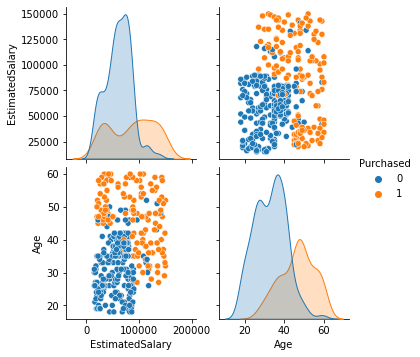

In [7]:
sns.pairplot(data=dataset,vars=["EstimatedSalary","Age"],hue="Purchased")

<AxesSubplot:xlabel='Purchased', ylabel='count'>

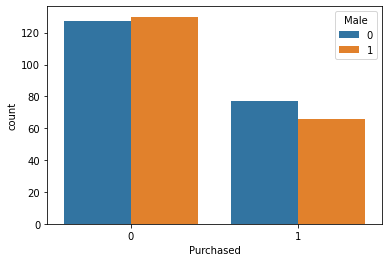

In [8]:
sns.countplot(x='Purchased',hue='Male',data=dataset)

## Train Test Split

In [9]:
X=dataset.drop("Purchased",axis=1)
y=dataset['Purchased']

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training and Predicting

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(X_test)

## Evaluation

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))

[[64  4]
 [ 4 28]]


- True Positives (TP): The number of instances where the model correctly predicted that the customer purchased a product. In this case, this is represented by the number 28.

- True Negatives (TN): The number of instances where the model correctly predicted that the customer did not purchase a product. In this case, this is represented by the number 64.

- False Positives (FP): The number of instances where the model incorrectly predicted that the customer purchased a product when they actually did not. This is also known as a "Type I error." In this case, this is represented by the number 4.

- False Negatives (FN): The number of instances where the model incorrectly predicted that the customer did not purchase a product when they actually did. This is also known as a "Type II error." In this case, this is represented by the number 4.

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



## GridSearch for best k

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':list(range(1,50))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.883 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.833 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.833 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.817 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.917 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.867 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.833 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.817 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.850 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.883 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.917 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [18]:
grid.best_params_

{'n_neighbors': 5}

In [19]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [20]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



- True Positives (TP): 29 (customers correctly predicted to have purchased a product)
- True Negatives (TN): 64 (customers correctly predicted to have not purchased a product)
- False Positives (FP): 4 (customers incorrectly predicted to have purchased a product)
- False Negatives (FN): 3 (customers incorrectly predicted to have not purchased a product)